In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import pickle

In [2]:
data = pd.read_csv('./data.csv')
result = pd.read_csv('./result.csv')
df = pd.concat([data, result['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df.shape

(15000, 9)

In [4]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [9]:
correlation =  df.drop('Gender', axis=1).corr()

<Axes: >

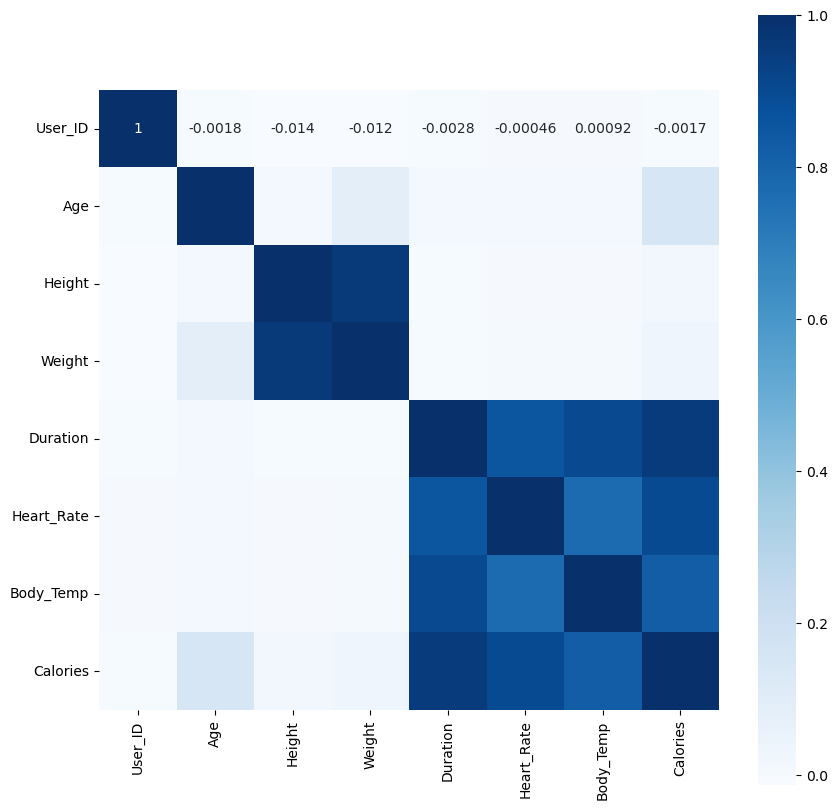

In [10]:
plt.figure(figsize=(10, 10));
sns.heatmap(correlation, square=True, cbar=True, annot=True, cmap='Blues')

In [11]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [12]:
df = df.replace({"Gender": {'female': 0, 'male': 1}})
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [13]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [14]:
df.dtypes

User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,1,37,179.0,77.0,7.0,81.0,39.5
9680,1,23,195.0,87.0,26.0,110.0,40.5
7093,1,33,181.0,77.0,12.0,88.0,40.1
11293,0,66,156.0,54.0,9.0,77.0,39.5
820,0,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,0,75,148.0,51.0,22.0,104.0,40.6
13418,0,21,172.0,67.0,20.0,104.0,40.7
5390,1,57,189.0,92.0,8.0,90.0,39.5
860,1,35,174.0,76.0,12.0,97.0,40.2


In [17]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11499,0,45,154.0,52.0,26.0,107.0,40.6
6475,1,21,187.0,90.0,29.0,111.0,40.5
13167,1,58,176.0,77.0,11.0,90.0,40.0
862,1,35,182.0,89.0,24.0,108.0,40.8
5970,0,67,171.0,67.0,29.0,116.0,41.1
...,...,...,...,...,...,...,...
6216,0,61,166.0,66.0,28.0,106.0,41.0
3585,0,73,165.0,66.0,10.0,92.0,40.0
10023,0,38,169.0,66.0,20.0,104.0,40.2
14044,0,25,163.0,54.0,5.0,86.0,39.2


In [18]:
y_test

11499    173.0
6475     189.0
13167     53.0
862      161.0
5970     226.0
         ...  
6216     186.0
3585      53.0
10023    120.0
14044     20.0
12965    214.0
Name: Calories, Length: 3000, dtype: float64

In [19]:
model = XGBRegressor()

In [20]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
test_prediction = model.predict(X_test)

In [22]:
mae = metrics.mean_absolute_error(y_test, test_prediction)
mae

1.4981198125282924

In [23]:
r2_square = metrics.r2_score(y_test, test_prediction)
r2_square

0.9988678909361673

In [54]:
# building system
input_data = (1, 68, 190.0, 94.0, 29.0, 105.0, 40.8)
# input_data = (0, 20, 166.0, 60.0, 14.0, 94.0, 40.3)
# input_data = (0, 45, 154.0, 52.0, 26.0, 107.0, 40.6)
# input_data = (0, 61, 166.0, 66.0, 28.0, 106.0, 41.0)
input_array = np.asarray(input_data)
input_reshape = input_array.reshape(1, -1)

predict = model.predict(input_reshape)
predict

array([234.31616], dtype=float32)

In [25]:
for column in X_train.columns:
    print(type(column))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [26]:
filename = "calories_model.sav"
pickle.dump(model, open(filename, 'wb'))
print("Save done")

Save done
